MNIST Digit Recognition Using Numpy



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("train.csv")

In [12]:
data.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data.shape #42000 examples with 785 columns = 784 pixels with one label

(42000, 785)

In [14]:
data = np.array(data)
m, n = data.shape # m = Total number of training examples, n = Total number of pixels 28 X 28 =784
np.random.shuffle(data)



In [70]:
dev_set = data[0:1000].T
Y_dev = dev_set[0]
X_dev = dev_set[1:n]
X_dev = X_dev / 255
print(dev_set.shape)
print(X_dev.shape)
print(Y_dev.shape)

(785, 1000)
(784, 1000)
(1000,)


In [71]:
train_set = data[1000:m].T
Y_train = train_set[0]
X_train = train_set[1:n]
X_train = X_train/255
print(train_set.shape)
print(X_train.shape)
print(Y_train.shape)


(785, 41000)
(784, 41000)
(41000,)


In [109]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.zeros((10,1))
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.zeros((10,1))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2,axis = 1,keepdims = True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1,axis = 1,keepdims = True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [110]:
def get_predictions(A2):
    
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    a = predictions == Y
    return np.sum(a)/Y.shape[0]

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_parameters()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [111]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[3 0 3 ... 1 6 7] [6 0 6 ... 1 1 9]
0.09982926829268293
Iteration:  10
[7 0 7 ... 2 6 7] [6 0 6 ... 1 1 9]
0.19921951219512196
Iteration:  20
[2 0 7 ... 2 5 4] [6 0 6 ... 1 1 9]
0.29853658536585365
Iteration:  30
[2 0 2 ... 2 5 4] [6 0 6 ... 1 1 9]
0.4090243902439024
Iteration:  40
[2 0 2 ... 7 5 9] [6 0 6 ... 1 1 9]
0.4919512195121951
Iteration:  50
[2 0 2 ... 7 1 9] [6 0 6 ... 1 1 9]
0.5466829268292683
Iteration:  60
[2 0 2 ... 7 1 9] [6 0 6 ... 1 1 9]
0.5878536585365853
Iteration:  70
[2 0 2 ... 8 1 9] [6 0 6 ... 1 1 9]
0.6180975609756097
Iteration:  80
[2 0 2 ... 8 1 9] [6 0 6 ... 1 1 9]
0.6425609756097561
Iteration:  90
[2 0 2 ... 8 1 9] [6 0 6 ... 1 1 9]
0.662829268292683
Iteration:  100
[2 0 2 ... 8 1 9] [6 0 6 ... 1 1 9]
0.6791951219512196
Iteration:  110
[2 0 2 ... 8 1 9] [6 0 6 ... 1 1 9]
0.6940975609756097
Iteration:  120
[2 0 2 ... 8 1 9] [6 0 6 ... 1 1 9]
0.707
Iteration:  130
[2 0 2 ... 8 1 9] [6 0 6 ... 1 1 9]
0.7173414634146341
Iteration:  140
[2 0 2 ... 8

In [112]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


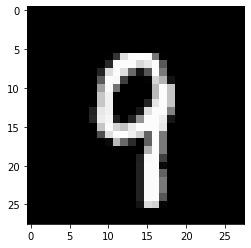

In [113]:
test_prediction(40999, W1, b1, W2, b2)

In [108]:
#Loading the test set
test = pd.read_csv('test.csv')
test = np.array(test)
print(test.shape)

(28000, 784)


In [107]:
#Testing on the dev_set
predictions = make_predictions(X_dev, W1, b1, W2, b2)
print(get_accuracy(predictions, Y_dev))

[0 0 4 9 3 8 9 7 4 8 4 4 7 2 7 3 1 6 0 9 8 2 3 4 2 9 0 1 4 6 4 9 6 9 7 4 4
 7 5 5 9 6 9 3 5 8 3 7 7 1 8 1 5 2 2 9 1 4 4 7 9 1 0 7 0 3 5 2 9 9 0 5 4 3
 7 8 9 7 6 0 3 0 2 7 9 2 4 7 0 2 3 8 1 1 1 2 9 2 8 8 2 6 3 0 0 3 3 4 5 3 7
 9 0 6 2 2 8 0 9 8 3 4 1 8 6 5 0 3 8 2 7 3 7 7 8 9 2 6 7 5 4 8 1 4 3 8 5 2
 4 4 0 0 7 8 6 8 6 2 5 9 9 9 4 7 5 3 8 5 5 3 1 5 4 5 0 8 4 6 0 5 6 1 9 0 7
 3 0 3 0 5 6 8 1 2 2 8 7 1 7 1 6 9 9 4 1 1 6 9 3 4 4 1 4 4 4 5 2 9 7 4 6 1
 6 3 3 1 0 4 7 3 7 0 3 6 9 1 0 8 9 0 9 6 7 4 2 9 2 3 1 9 7 3 7 9 7 1 9 7 8
 6 8 3 4 0 9 9 6 7 2 9 2 4 7 5 0 3 7 5 6 4 7 2 2 6 0 2 0 6 4 7 6 0 0 0 7 0
 2 1 9 6 6 1 1 6 0 4 1 2 5 8 6 1 9 9 2 3 2 1 8 8 6 4 5 3 7 9 9 3 0 4 2 1 7
 0 3 2 0 3 5 4 9 9 1 2 8 3 8 3 6 5 0 8 1 8 5 4 7 9 3 2 3 1 3 5 0 4 1 8 8 9
 1 1 2 9 8 8 4 0 5 1 5 3 9 5 1 5 1 4 1 9 6 3 6 8 5 6 9 3 2 0 9 5 7 7 9 0 4
 1 8 3 7 2 6 1 6 8 9 5 1 7 5 8 4 9 2 2 3 1 1 0 3 7 9 7 7 6 8 0 9 0 5 7 3 1
 7 9 4 7 1 2 7 3 3 1 5 1 6 6 1 3 5 8 4 8 3 7 2 1 2 8 1 0 2 5 4 4 5 3 9 8 8
 0 4 6 2 4 0 2 1 9 3 1 5 